# Imports

In [59]:
import pandas as pd

#inputing
from sklearn.impute import KNNImputer
#dataset division
from sklearn.model_selection import train_test_split
#Scaller (Robust)
from sklearn.preprocessing import RobustScaler, MinMaxScaler


import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

#Lasso Regression
from sklearn.linear_model import LassoCV

#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier


import scipy.stats as stats
from scipy.stats import chi2_contingency

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Train Dataset

In [60]:
train = pd.read_csv("Project_train_dataset.csv")
train.set_index("Student ID", inplace = True)
train.head()

,Program,Student Gender,Experience Level,Student Siblings,Student Family,Financial Background,School Dormitory,School of Origin,Student Social Influence,Favourite Study Element,Admitted in School
Student ID,,,,,,,,,,,
1,Sorcery School,male,22.0,1,0,7.2500,NaN,Mystic Academy,18,Fire,0
2,Magi Academy,female,38.0,1,0,71.2833,Cottage Chamber,Eldertree Enclave,7,Fire,1
3,Sorcery School,female,26.0,0,0,7.9250,NaN,Mystic Academy,12,Air,1
5,Sorcery School,male,35.0,0,0,8.0500,NaN,Mystic Academy,12,Air,0
6,Sorcery School,male,NaN,0,0,8.4583,NaN,Arcan Institute,11,Earth,0


In [61]:
train.describe()

,Experience Level,Student Siblings,Student Family,Financial Background,Student Social Influence,Admitted in School
count,567.000000,713.000000,713.000000,713.000000,713.000000,713.000000
mean,29.890952,0.521739,0.354839,31.327238,12.719495,0.353436
std,14.599272,1.057287,0.770985,50.903034,6.949648,0.478372
min,0.420000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,20.750000,0.000000,0.000000,7.925000,7.000000,0.000000
50%,28.000000,0.000000,0.000000,14.400000,13.000000,0.000000
75%,39.000000,1.000000,0.000000,30.000000,19.000000,1.000000
max,80.000000,8.000000,6.000000,512.329200,24.000000,1.000000


In [62]:
train.describe(include = "O")

,Program,Student Gender,School Dormitory,School of Origin,Favourite Study Element
count,713,713,153,713,713
unique,3,2,6,3,4
top,Sorcery School,male,Mystical Chamber,Mystic Academy,Earth
freq,391,469,51,524,184


In [63]:
train.isna().sum()

Program                       0
Student Gender                0
Experience Level            146
Student Siblings              0
Student Family                0
Financial Background          0
School Dormitory            560
School of Origin              0
Student Social Influence      0
Favourite Study Element       0
Admitted in School            0
dtype: int64

In [64]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 713 entries, 1 to 889
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Program                   713 non-null    object 
 1   Student Gender            713 non-null    object 
 2   Experience Level          567 non-null    float64
 3   Student Siblings          713 non-null    int64  
 4   Student Family            713 non-null    int64  
 5   Financial Background      713 non-null    float64
 6   School Dormitory          153 non-null    object 
 7   School of Origin          713 non-null    object 
 8   Student Social Influence  713 non-null    int64  
 9   Favourite Study Element   713 non-null    object 
 10  Admitted in School        713 non-null    int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 66.8+ KB


In [65]:
1-173/713

0.7573632538569425

## Conclusion 1

As the column "School Dormitory" has more than 70% missing values (has 76%) then we can drop this variable according to the rule of thumb as can be seen in https://medium.com/@danberdov/dealing-with-missing-data-8b71cd819501

In [66]:
train1 = train.drop(columns = "School Dormitory")
train1.head()

,Program,Student Gender,Experience Level,Student Siblings,Student Family,Financial Background,School of Origin,Student Social Influence,Favourite Study Element,Admitted in School
Student ID,,,,,,,,,,
1,Sorcery School,male,22.0,1,0,7.2500,Mystic Academy,18,Fire,0
2,Magi Academy,female,38.0,1,0,71.2833,Eldertree Enclave,7,Fire,1
3,Sorcery School,female,26.0,0,0,7.9250,Mystic Academy,12,Air,1
5,Sorcery School,male,35.0,0,0,8.0500,Mystic Academy,12,Air,0
6,Sorcery School,male,NaN,0,0,8.4583,Arcan Institute,11,Earth,0


# Test Dataset

In [67]:
test = pd.read_csv("Project_test_dataset.csv", index_col = 0)

In [68]:
test = test.drop(columns = "School Dormitory")

## Convert all variables to numeric ones

In [69]:
train_2 = pd.get_dummies(data = train1, prefix = "", prefix_sep = "")
train_2.head()

,Experience Level,Student Siblings,Student Family,Financial Background,Student Social Influence,Admitted in School,Magi Academy,Sorcery School,Witchcraft Institute,female,male,Arcan Institute,Eldertree Enclave,Mystic Academy,Air,Earth,Fire,Water
Student ID,,,,,,,,,,,,,,,,,,
1,22.0,1,0,7.2500,18,0,False,True,False,False,True,False,False,True,False,False,True,False
2,38.0,1,0,71.2833,7,1,True,False,False,True,False,False,True,False,False,False,True,False
3,26.0,0,0,7.9250,12,1,False,True,False,True,False,False,False,True,True,False,False,False
5,35.0,0,0,8.0500,12,0,False,True,False,False,True,False,False,True,True,False,False,False
6,NaN,0,0,8.4583,11,0,False,True,False,False,True,True,False,False,False,True,False,False


In [70]:
train_2.columns

Index(['Experience Level', 'Student Siblings', 'Student Family',
       'Financial Background', 'Student Social Influence',
       'Admitted in School', 'Magi Academy', 'Sorcery School',
       'Witchcraft Institute', 'female', 'male', 'Arcan Institute ',
       'Eldertree Enclave', 'Mystic Academy', 'Air', 'Earth', 'Fire', 'Water'],
      dtype='object')

In [71]:
train_2 = train_2[['Sorcery School', 'Magi Academy', "male", "Experience Level", "Student Siblings", "Student Family", "Financial Background", 'Mystic Academy', 'Eldertree Enclave', "Student Social Influence", 'Fire', 'Air', 'Earth', "Admitted in School"]]
train_2.head()

,Sorcery School,Magi Academy,male,Experience Level,Student Siblings,Student Family,Financial Background,Mystic Academy,Eldertree Enclave,Student Social Influence,Fire,Air,Earth,Admitted in School
Student ID,,,,,,,,,,,,,,
1,True,False,True,22.0,1,0,7.2500,True,False,18,True,False,False,0
2,False,True,False,38.0,1,0,71.2833,False,True,7,True,False,False,1
3,True,False,False,26.0,0,0,7.9250,True,False,12,False,True,False,1
5,True,False,True,35.0,0,0,8.0500,True,False,12,False,True,False,0
6,True,False,True,NaN,0,0,8.4583,False,False,11,False,False,True,0


This version of the dataset will have the dummy variables being "Arcan Institute", "female", "Witchcraft Institute", "Water" all dropped as when you have dummy variables you only need to have n-1 new columns (n being the number of unique values on the original columns)

Now we do the same but for the test

In [72]:
test= pd.get_dummies(data = test, prefix = "", prefix_sep = "")
test.head()

,Experience Level,Student Siblings,Student Family,Financial Background,Student Social Influence,Magi Academy,Sorcery School,Witchcraft Institute,female,male,Arcan Institute,Eldertree Enclave,Mystic Academy,Air,Earth,Fire,Water
Student ID,,,,,,,,,,,,,,,,,
836,39.0,1,1,83.1583,16,True,False,False,True,False,False,True,False,False,False,True,False
323,30.0,0,0,12.3500,1,False,False,True,True,False,True,False,False,False,True,False,False
117,70.5,0,0,7.7500,9,False,True,False,False,True,True,False,False,False,True,False,False
444,28.0,0,0,13.0000,9,False,False,True,True,False,False,False,True,True,False,False,False
619,4.0,2,1,39.0000,8,False,False,True,True,False,False,False,True,False,False,False,True


In [73]:
test = test[['Sorcery School', 'Magi Academy', "male", "Experience Level", "Student Siblings", "Student Family", "Financial Background", 'Mystic Academy', 'Eldertree Enclave', "Student Social Influence", 'Fire', 'Air', 'Earth']]

## Impute the other missing values

In [74]:
imputer = KNNImputer(n_neighbors = 7, weights = "distance").fit(train_2)

As this is a small dataset, usually the best n for this kin

In [75]:
train_inputed = imputer.transform(train_2)

In [76]:
train_inputed1 = pd.DataFrame(train_inputed, columns = train_2.columns, index = train_2.index)
train_inputed1.head()

,Sorcery School,Magi Academy,male,Experience Level,Student Siblings,Student Family,Financial Background,Mystic Academy,Eldertree Enclave,Student Social Influence,Fire,Air,Earth,Admitted in School
Student ID,,,,,,,,,,,,,,
1,1.0,0.0,1.0,22.00000,1.0,0.0,7.2500,1.0,0.0,18.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,38.00000,1.0,0.0,71.2833,0.0,1.0,7.0,1.0,0.0,0.0,1.0
3,1.0,0.0,0.0,26.00000,0.0,0.0,7.9250,1.0,0.0,12.0,0.0,1.0,0.0,1.0
5,1.0,0.0,1.0,35.00000,0.0,0.0,8.0500,1.0,0.0,12.0,0.0,1.0,0.0,0.0
6,1.0,0.0,1.0,22.94282,0.0,0.0,8.4583,0.0,0.0,11.0,0.0,0.0,1.0,0.0


Now for the test dataset

In [77]:
imputer = KNNImputer(n_neighbors = 7, weights = "distance").fit(train_2.drop(columns = "Admitted in School"))

In [78]:
test_inputed = imputer.transform(test)

In [79]:
test= pd.DataFrame(test_inputed, columns = test.columns, index = test.index)
test.head()

,Sorcery School,Magi Academy,male,Experience Level,Student Siblings,Student Family,Financial Background,Mystic Academy,Eldertree Enclave,Student Social Influence,Fire,Air,Earth
Student ID,,,,,,,,,,,,,
836,0.0,1.0,0.0,39.0,1.0,1.0,83.1583,0.0,1.0,16.0,1.0,0.0,0.0
323,0.0,0.0,0.0,30.0,0.0,0.0,12.3500,0.0,0.0,1.0,0.0,0.0,1.0
117,1.0,0.0,1.0,70.5,0.0,0.0,7.7500,0.0,0.0,9.0,0.0,0.0,1.0
444,0.0,0.0,0.0,28.0,0.0,0.0,13.0000,1.0,0.0,9.0,0.0,1.0,0.0
619,0.0,0.0,0.0,4.0,2.0,1.0,39.0000,1.0,0.0,8.0,0.0,0.0,0.0


# Division of the dataset

In [80]:
x = train_inputed1.drop(columns = "Admitted in School")
y = train_inputed1[["Admitted in School"]]

In [81]:
X_train, X_val, y_train, y_val = train_test_split(x,
                                                  y,
                                                  train_size = 0.70,
                                                  random_state = 15,
                                                  stratify = y
                                                  
)

We divided the dataset into 70% for the trainning and 30% for validation using a random state 15

# Feature Scaling

We will use RobustScaler as we are not sure that our data will folow a Normal, Gaussian, Uniform or Linear distributions it is the best option out of StandarScaler, MinMaxScaler and RobustScaler

In [82]:
rb_scaler = RobustScaler().fit(X_train)

In [83]:
X_train_rb = rb_scaler.transform(X_train)
X_train_rb = pd.DataFrame(X_train_rb, columns = X_train.columns).set_index(X_train.index)
X_train_rb.head(3)

,Sorcery School,Magi Academy,male,Experience Level,Student Siblings,Student Family,Financial Background,Mystic Academy,Eldertree Enclave,Student Social Influence,Fire,Air,Earth
Student ID,,,,,,,,,,,,,
142,0.0,0.0,-1.0,-0.462757,0.0,0.0,-0.285063,0.0,0.0,0.250000,0.0,0.0,1.0
399,-1.0,0.0,0.0,-0.391441,0.0,0.0,-0.159635,0.0,0.0,-0.666667,0.0,1.0,0.0
849,-1.0,0.0,0.0,-0.034862,0.0,1.0,0.866591,0.0,0.0,0.916667,0.0,1.0,0.0


In [84]:
X_val_rb = rb_scaler.transform(X_val)
X_val_rb = pd.DataFrame(X_val_rb, columns = X_val.columns).set_index(X_val.index)
X_val_rb.head(3)

,Sorcery School,Magi Academy,male,Experience Level,Student Siblings,Student Family,Financial Background,Mystic Academy,Eldertree Enclave,Student Social Influence,Fire,Air,Earth
Student ID,,,,,,,,,,,,,
734,-1.0,0.0,0.0,-0.391441,0.0,0.0,-0.045610,0.0,0.0,0.916667,0.0,1.0,0.0
803,-1.0,1.0,0.0,-1.247232,1.0,2.0,4.834664,0.0,0.0,-0.250000,0.0,1.0,0.0
634,-1.0,1.0,0.0,0.307259,0.0,0.0,-0.638540,0.0,0.0,0.916667,1.0,0.0,0.0


Now for the test dataset

In [85]:
test_rb = rb_scaler.transform(test)
test_rb = pd.DataFrame(test_rb, columns = test.columns).set_index(test.index)
test_rb.head(3)

,Sorcery School,Magi Academy,male,Experience Level,Student Siblings,Student Family,Financial Background,Mystic Academy,Eldertree Enclave,Student Social Influence,Fire,Air,Earth
Student ID,,,,,,,,,,,,,
836,-1.0,1.0,-1.0,0.749613,1.0,1.0,3.154312,-1.0,1.0,0.250000,1.0,0.0,0.0
323,-1.0,0.0,-1.0,0.107770,0.0,0.0,-0.075257,-1.0,0.0,-1.000000,0.0,0.0,1.0
117,0.0,0.0,0.0,2.996062,0.0,0.0,-0.285063,-1.0,0.0,-0.333333,0.0,0.0,1.0


Now we store this updated version of this test dataset in a new excell sheet

In [86]:
test_rb.to_csv("Data_after_feature_selection/test_data_scalled.csv")

# Feature selection 

## For the originally numerical features

In [87]:
X_train_n = X_train_rb[["Experience Level", "Student Siblings", "Student Family", "Financial Background", "Student Social Influence"]]

In [88]:
X_val_n =  X_val_rb[["Experience Level", "Student Siblings", "Student Family", "Financial Background", "Student Social Influence"]]

## Univariate variables

In [89]:
X_train_n.var()

Experience Level            0.885383
Student Siblings            0.961224
Student Family              0.520302
Financial Background        4.309175
Student Social Influence    0.333015
dtype: float64

As no variable is univariate we keep all for now

## Spearman Correlation

In [90]:
#Join x and y train to see the correlation of all variables betweeen eachother and with the target also
all_train = X_train_n.join(y_train)
all_train.head()

,Experience Level,Student Siblings,Student Family,Financial Background,Student Social Influence,Admitted in School
Student ID,,,,,,
142,-0.462757,0.0,0.0,-0.285063,0.250000,1.0
399,-0.391441,0.0,0.0,-0.159635,-0.666667,0.0
849,-0.034862,0.0,1.0,0.866591,0.916667,0.0
522,-0.462757,0.0,0.0,-0.278413,-0.916667,0.0
681,0.174915,0.0,0.0,-0.267389,0.833333,0.0


In [91]:
def cor_heatmap(cor):
    plt.figure(figsize=(12,10))
    mask = np.triu(np.ones_like(cor, dtype=bool)) #Creates a mask so that only the values of the lower diagonal appear
    sns.heatmap(data = cor, annot = True, cmap = plt.cm.Reds, fmt='.1', mask = mask)
    plt.show()

In [92]:
corr_all_train = all_train.corr(method = "spearman")

In [93]:
corr_all_train

,Experience Level,Student Siblings,Student Family,Financial Background,Student Social Influence,Admitted in School
Experience Level,1.000000,-0.157675,-0.248105,0.131510,0.039432,-0.069396
Student Siblings,-0.157675,1.000000,0.480444,0.457908,0.010752,0.074007
Student Family,-0.248105,0.480444,1.000000,0.380926,0.052373,0.137458
Financial Background,0.131510,0.457908,0.380926,1.000000,0.072481,0.310550
Student Social Influence,0.039432,0.010752,0.052373,0.072481,1.000000,0.058698
Admitted in School,-0.069396,0.074007,0.137458,0.310550,0.058698,1.000000


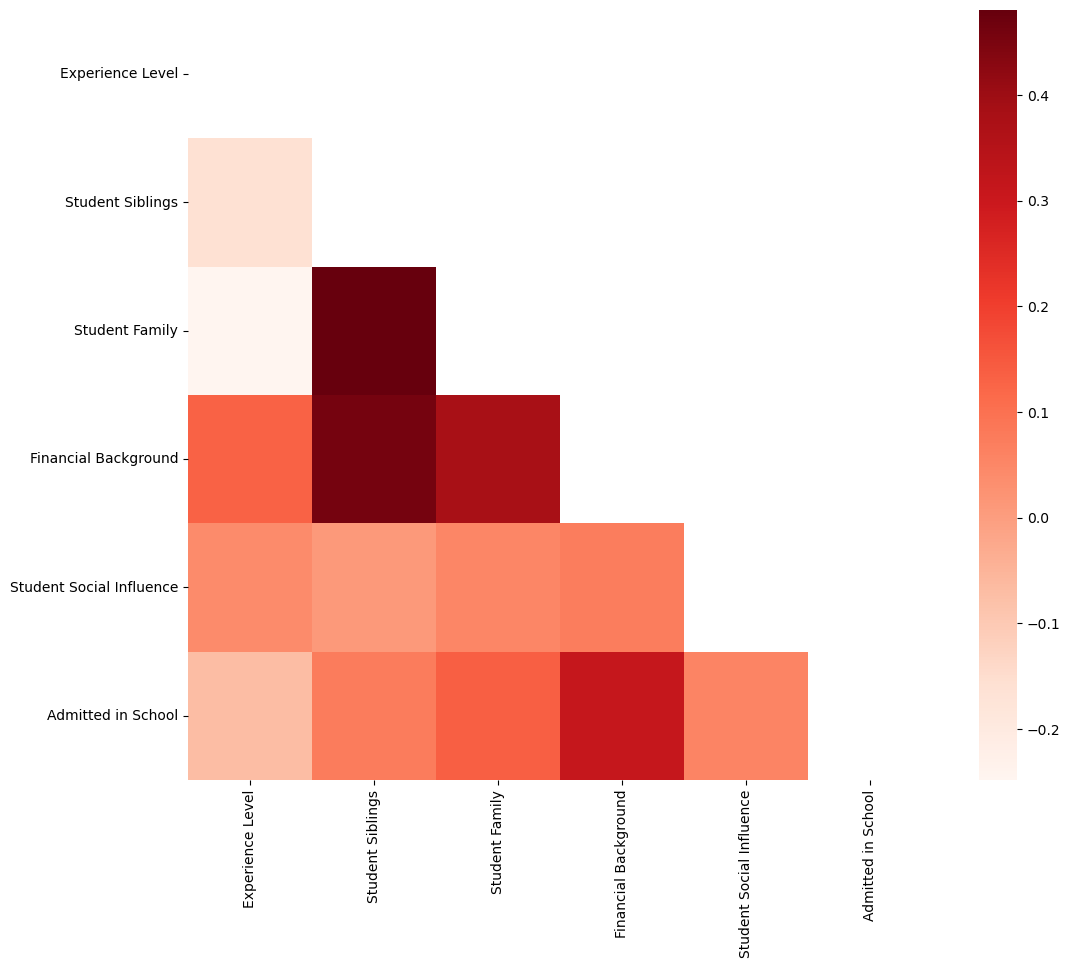

In [94]:
cor_heatmap(corr_all_train)

- There isn't any pair of variables highly correlated as all have correlation <0.50

- Also no variable seems to be highly correlated with the target either

## Logistic Regression 

In [95]:
# Number of features
nof_list=np.arange(1,len(X_train_n.columns))            
high_score=0
# Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    model = LogisticRegression()
    rfe = RFE(model,n_features_to_select = nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train_n, y_train)
    X_val_rfe = rfe.transform(X_val_n)
    model.fit(X_train_rfe,y_train)
    
    score = model.score(X_val_rfe,y_val)
    score_list.append(score)
    
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 1
Score with 1 features: 0.700935


Using the above cell we conclude that we will obtain the best results using 1 variable this variable will be: 

In [96]:
model = LogisticRegression()

In [97]:
rfe = RFE(estimator = model, n_features_to_select = 1)

In [98]:
X_rfe = rfe.fit_transform(X_train_n, y_train)

In [99]:
X_train_n.columns

Index(['Experience Level', 'Student Siblings', 'Student Family',
       'Financial Background', 'Student Social Influence'],
      dtype='object')

In [100]:
rfe.support_

array([False, False, False,  True, False])

This variables will be `Financial Background` 

## Lasso Regression

In [101]:
def plot_importance(coef,name):
    imp_coef = coef.sort_values()
    plt.figure(figsize=(8,10))
    imp_coef.plot(kind = "barh")
    plt.title("Feature importance using " + name + " Model")
    plt.show()

In [102]:
reg = LassoCV()

In [103]:
X_reg = reg.fit(X_train_n, y_train)

In [104]:
coef = pd.Series(reg.coef_, index = X_train_n.columns)
coef

Experience Level           -0.076844
Student Siblings           -0.064864
Student Family              0.044447
Financial Background        0.063493
Student Social Influence    0.039732
dtype: float64

In [105]:
coef == 0

Experience Level            False
Student Siblings            False
Student Family              False
Financial Background        False
Student Social Influence    False
dtype: bool

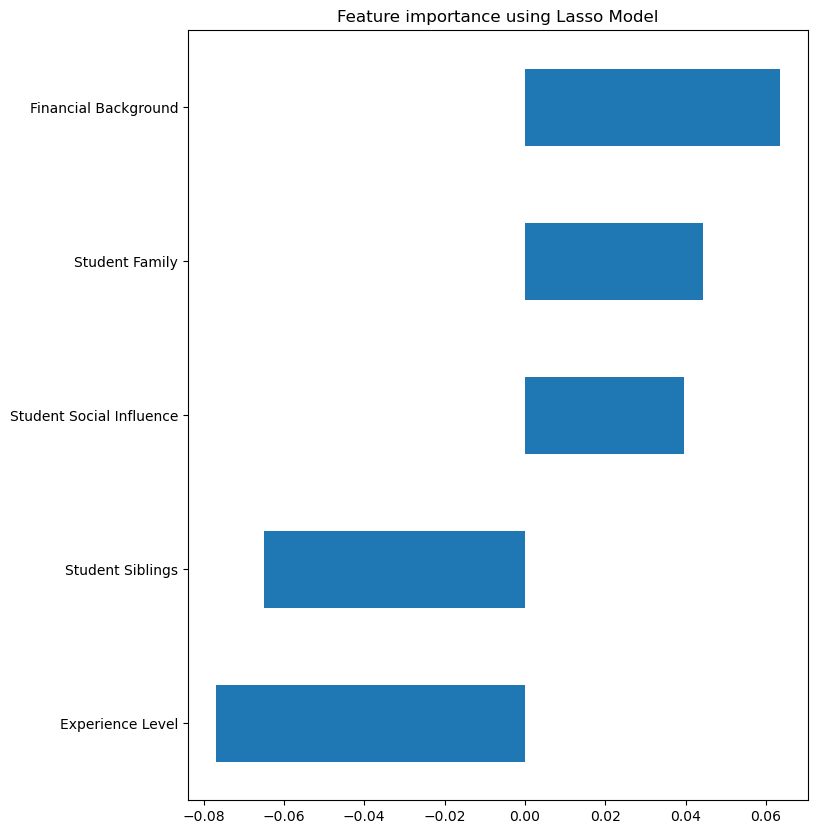

In [106]:
plot_importance(coef,'Lasso')

According to Lasso, all variables seem good predictors

# Decision Tree Classifier

In [107]:
gini_importance = DecisionTreeClassifier().fit(X_train_n, y_train).feature_importances_
entropy_importance = DecisionTreeClassifier(criterion='entropy').fit(X_train_n, y_train).feature_importances_

<Axes: xlabel='Value', ylabel='Col'>

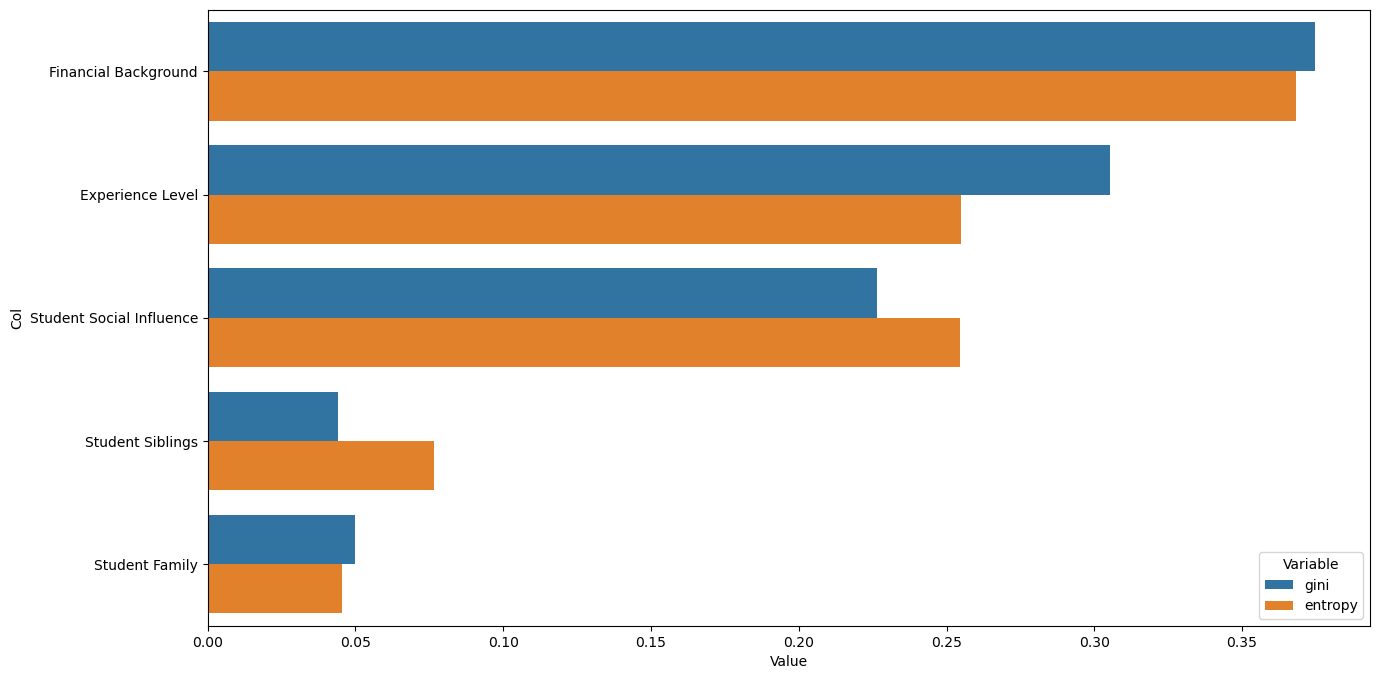

In [108]:
import seaborn as sns

zippy = pd.DataFrame(zip(gini_importance, entropy_importance), columns = ['gini','entropy'])
zippy['col'] = X_train_n.columns
tidy = zippy.melt(id_vars='col').rename(columns=str.title)
tidy.sort_values(['Value'], ascending = False, inplace = True)

plt.figure(figsize=(15,8))
sns.barplot(y='Col', x='Value', hue='Variable', data=tidy)

According to the decision tree all variables seem good estimator althow `Students Sibiling` and `Student Family` are the weaker ones

### Conclusions for numerical data

<hr>


#### Numerical Data

| Predictor | Spearman Correlation | Logistic Regression | Lasso Regression | Decision Tree Classifier | Final Decision
| --- | --- | --- | --- | --- | --- |
| Experience Level | Discard | Discard | Keep | Keep | Keep |
| Student Siblings | Discard | Discard | Keep | Keep? | Keep |
| Student Family | Discard | Discard | Keep | Keep? | Keep |
| Financial Background | Discard | Keep | Keep | Keep | Keep |
| Student Social Influence | Discard | Discard | Keep | Keep | Keep |

<hr>

## For the originally categorical data

In [109]:
train1.head()

,Program,Student Gender,Experience Level,Student Siblings,Student Family,Financial Background,School of Origin,Student Social Influence,Favourite Study Element,Admitted in School
Student ID,,,,,,,,,,
1,Sorcery School,male,22.0,1,0,7.2500,Mystic Academy,18,Fire,0
2,Magi Academy,female,38.0,1,0,71.2833,Eldertree Enclave,7,Fire,1
3,Sorcery School,female,26.0,0,0,7.9250,Mystic Academy,12,Air,1
5,Sorcery School,male,35.0,0,0,8.0500,Mystic Academy,12,Air,0
6,Sorcery School,male,NaN,0,0,8.4583,Arcan Institute,11,Earth,0


In [110]:
X_2 = train1.drop(columns = "Admitted in School")
y_2 = train1["Admitted in School"]

In [111]:
X_train_2, X_val_2, y_train_2, y_val_2 = train_test_split(X_2,
                                                  y_2,
                                                  train_size = 0.70,
                                                  random_state = 15,
                                                  stratify = y
                                                  
)

In [112]:
train_cat = X_train_2.drop(columns = ["Experience Level", "Student Siblings", "Student Family", "Financial Background", "Student Social Influence"])

In [113]:
train_cat.head()

,Program,Student Gender,School of Origin,Favourite Study Element
Student ID,,,,
142,Sorcery School,female,Mystic Academy,Earth
399,Witchcraft Institute,male,Mystic Academy,Air
849,Witchcraft Institute,male,Mystic Academy,Air
522,Sorcery School,male,Mystic Academy,Earth
681,Sorcery School,female,Arcan Institute,Air


In [114]:
def TestIndependence(X,y,var,alpha=0.05):        
    dfObserved = pd.crosstab(y,X)
    chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
    dfExpected = pd.DataFrame(expected, columns=dfObserved.columns, index = dfObserved.index)
    if p<alpha:
        result="{0} is IMPORTANT for Prediction".format(var)
    else:
        result="{0} is NOT an important predictor. (Discard {0} from model)".format(var)
    print(result)

In [115]:
for var in train_cat:
    TestIndependence(train_cat[var],y_train, var)

ValueError: Data must be 1-dimensional, got ndarray of shape (499, 1) instead

So we conclude that we should only keep `Sorcery School`, `Magi Academy`,`male`, `Experience Level`, `Students Sibilings`, `Earth` as they are the most important one's to predict the target

# Export the dataset with only the features selected

In [ ]:
new_train_all_rb = X_train_rb.join(y_train)

In [ ]:
new_train_all_rb = new_train_all_rb[["Sorcery School", "Magi Academy", "male", "Experience Level", "Student Siblings", "Earth", 'Admitted in School']]

In [ ]:
new_train_all_rb

In [ ]:
new_val_all_rb = X_val_rb.join(y_val)

In [ ]:
new_val_all_rb = new_val_all_rb[["Sorcery School", "Magi Academy", "male", "Experience Level", "Student Siblings", "Earth", 'Admitted in School']]

In [ ]:
#new_val_all_rb = new_val_all_rb[['Sorcery School', 'Magi Academy', 'male', 'Experience Level','Student Siblings', 'Mystic Academy', 'Student Social Influence', 'Earth', "Admitted in School"]]

In [ ]:
new_train_all_rb.to_csv("Data_after_feature_selection/train_data_scalled.csv")

In [ ]:
new_val_all_rb.to_csv("Data_after_feature_selection/val_data_scalled.csv")

Now we have two new csv in the paste "Data_after_feature_selection" that should be used from now on